<a href="https://colab.research.google.com/github/chandana-nukala18/sixth-repo/blob/main/House_price_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

Load dataset

In [ ]:
import pandas as pd
df = pd.read_csv(r"/content/Housing.csv")

Check the head of the dataset

In [ ]:
 df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Data inspection

In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data cleaning

In [ ]:
#checking null values
df.isnull().sum()*100/df.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


Outliner analysis

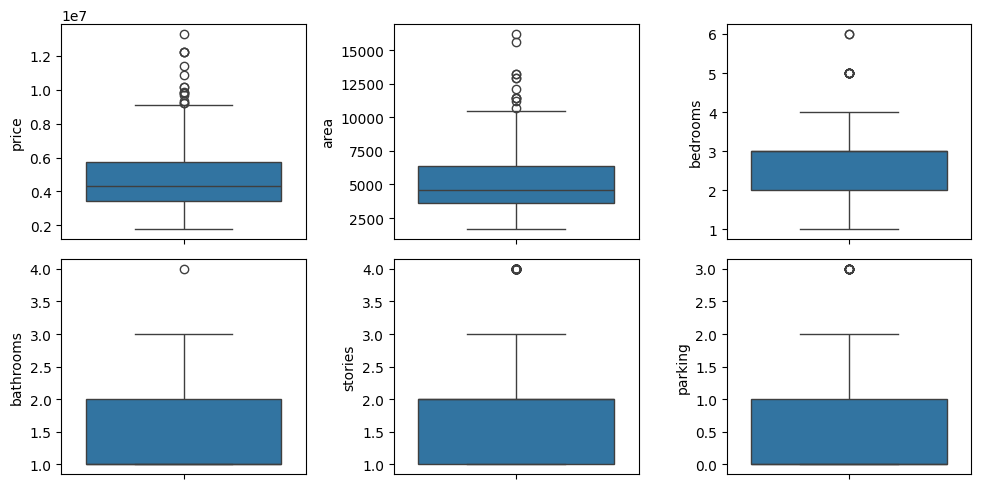

In [ ]:
#outliner analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

Outliner treatment for area

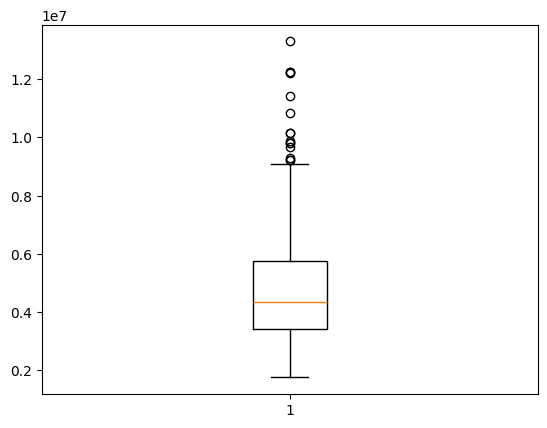

In [ ]:
#outliner treatment for area
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

Outliner analysis

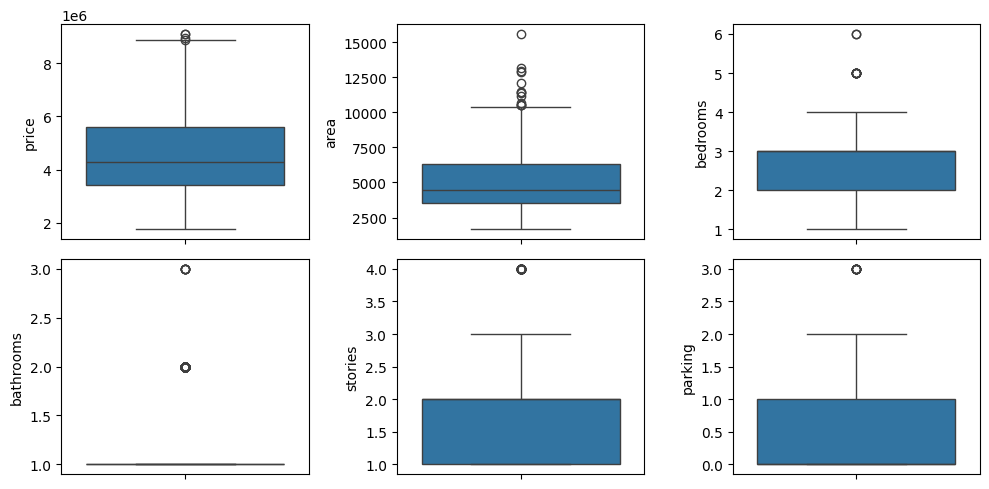

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

Visualaizing numerical values

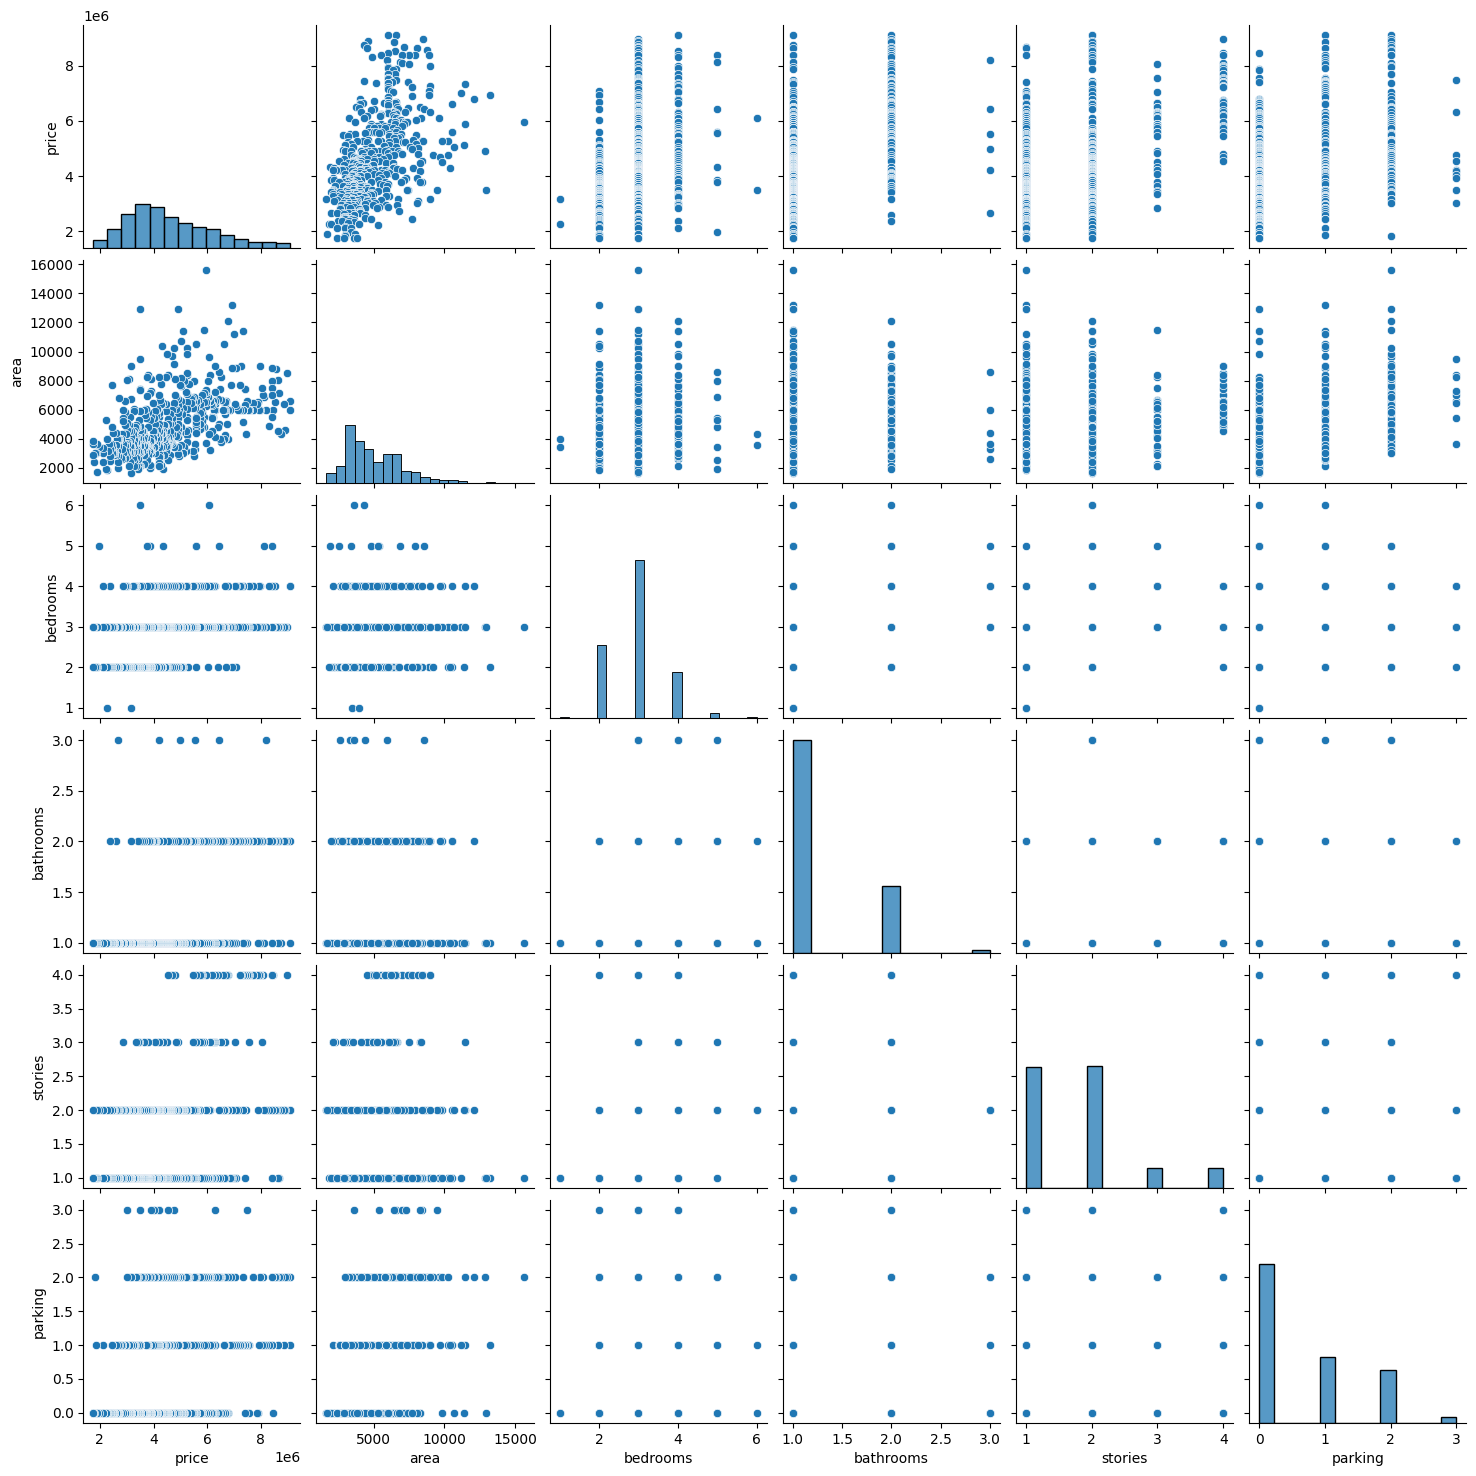

In [ ]:
sns.pairplot(df)
plt.show()

visualaizing categoreal values

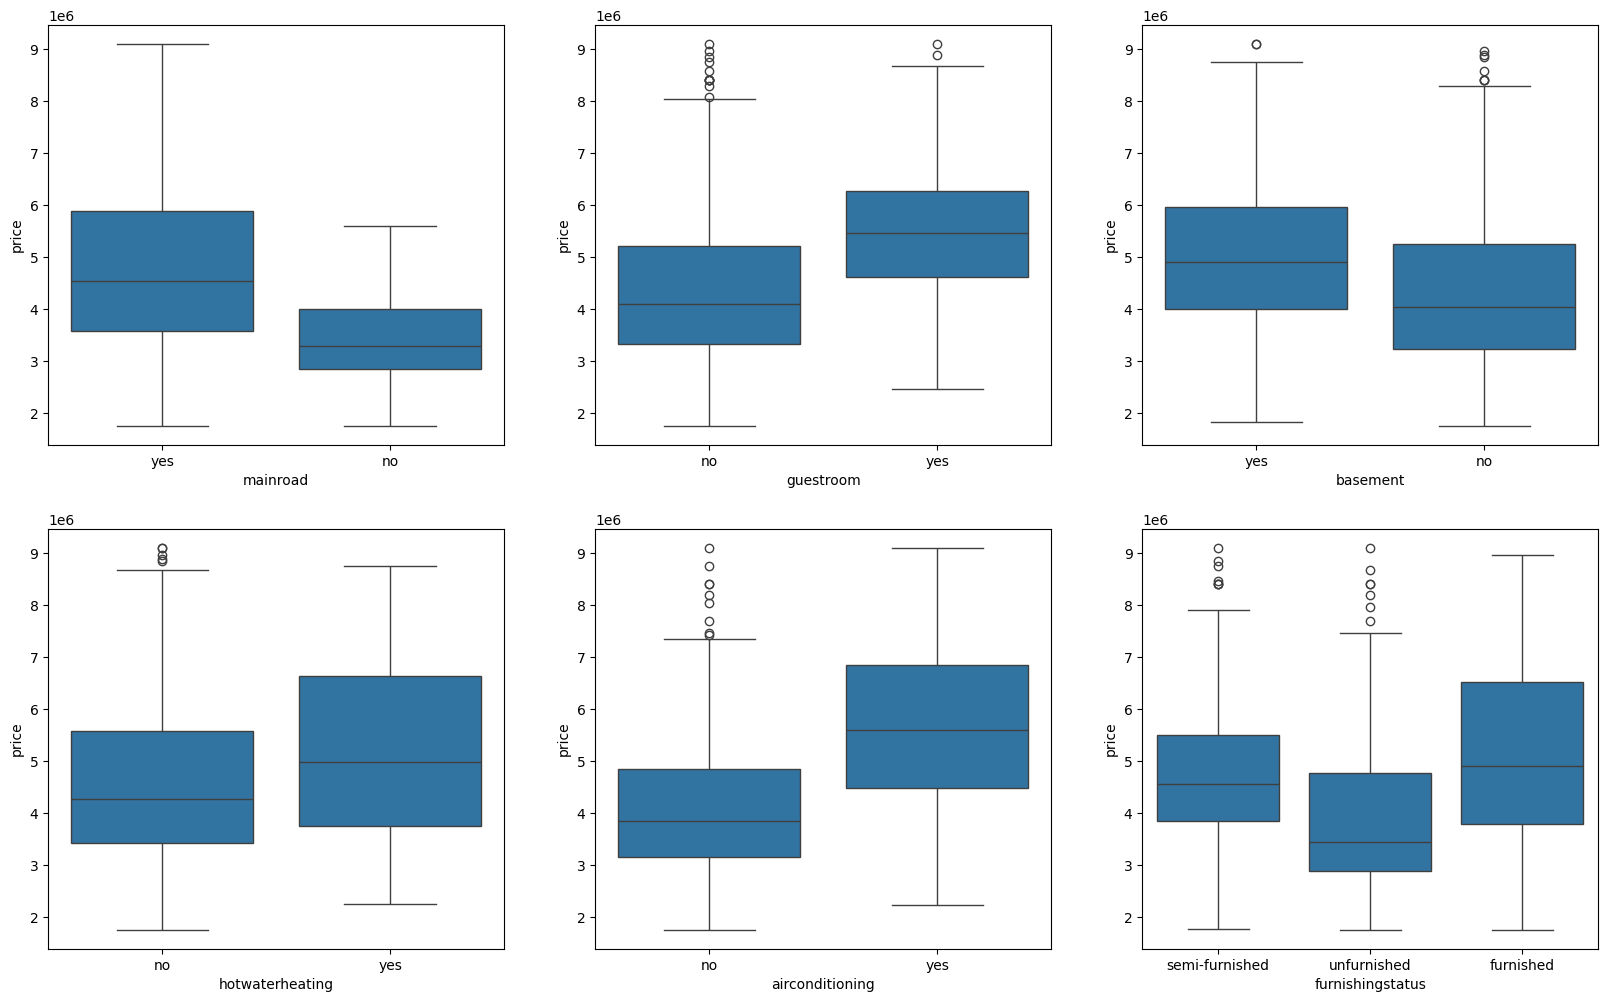

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price' , data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price' , data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()


Hue argument

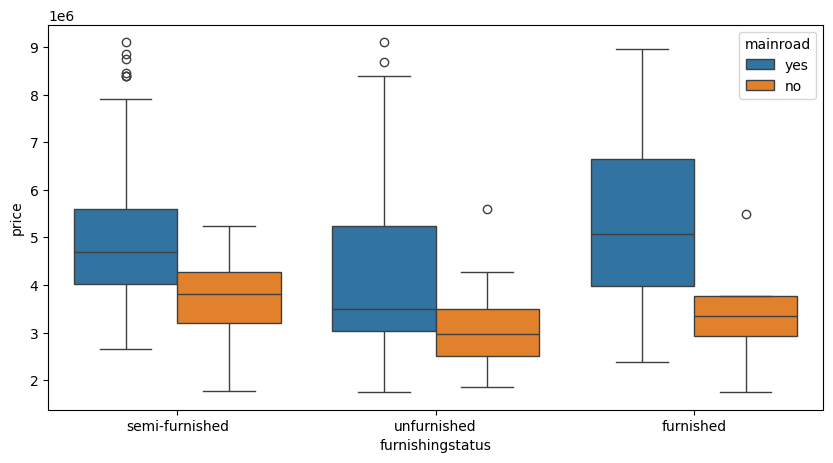

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'mainroad', data = df)
plt.show()

Data preparation

In [ ]:
#list of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#defining the map function
def binary_map(x):
  return x.map({'yes': 1, "no": 0})

#applying the function to the df list
df[varlist] = df[varlist].apply(binary_map)




In [ ]:
#check df now
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


Dummy variables

In [ ]:
status = pd.get_dummies(df['furnishingstatus'])

In [ ]:
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [ ]:
#lets drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [ ]:
#add the results to the original housing dataframe
df = pd.concat([df, status], axis = 1)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [ ]:
#drop 'furnishingstatus' as we have created the dummies for it
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


Train and test split

In [ ]:
#we specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,False,True
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,False,True
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,False,False
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,False,True
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,True,False


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.846361,0.172507,0.350404,0.048518,0.309973,0.219227,0.210243
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.361089,0.378331,0.477741,0.215147,0.463107,0.282378,0.408031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


correlation

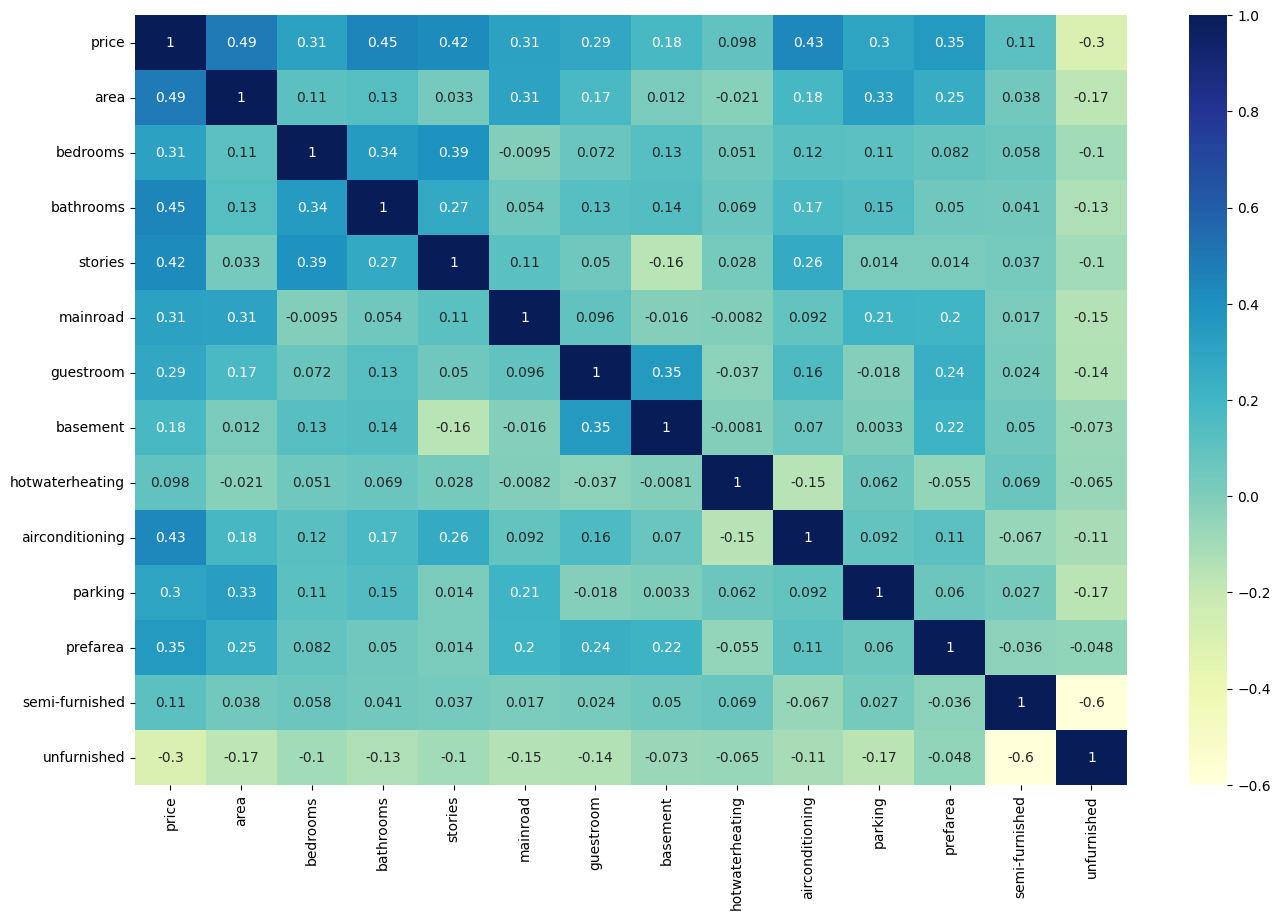

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Dividing into X and Y sets for model building

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

Model building

Recursive feature elimination

In [ ]:
#Importing RFE and linearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#running RFE
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.False_, np.int64(7)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('mainroad', np.False_, np.int64(5)),
 ('guestroom', np.False_, np.int64(6)),
 ('basement', np.False_, np.int64(4)),
 ('hotwaterheating', np.True_, np.int64(1)),
 ('airconditioning', np.True_, np.int64(1)),
 ('parking', np.False_, np.int64(2)),
 ('prefarea', np.True_, np.int64(1)),
 ('semi-furnished', np.False_, np.int64(8)),
 ('unfurnished', np.False_, np.int64(3))]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [ ]:
X_train.columns[rfe.support_]

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

Building model using statsmodel for detailed statistics

In [ ]:
#creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#lets see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     90.72
Date:                Sun, 04 May 2025   Prob (F-statistic):           3.19e-69
Time:                        11:36:11   Log-Likelihood:                 218.90
No. Observations:                 371   AIC:                            -423.8
Df Residuals:                     364   BIC:                            -396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1123      0.015     

In [ ]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.72
5,airconditioning,1.16
3,stories,1.15
2,bathrooms,1.11
1,area,1.11
6,prefarea,1.07
4,hotwaterheating,1.04


Residual analysis of train data

<ipython-input-55-aa222a26d3ab>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 20)


Text(0.5, 0, 'Errors')

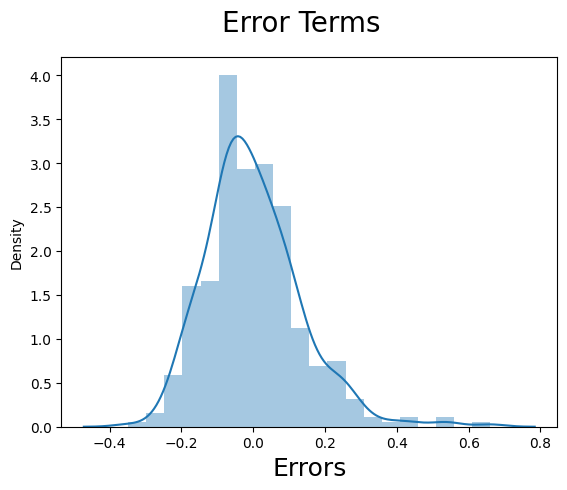

In [ ]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train - y_train_price)


#importing the required libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

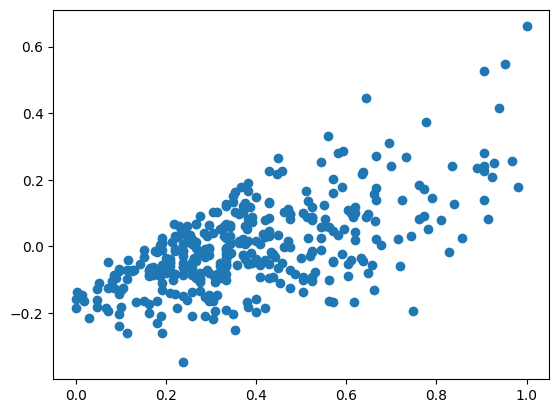

In [ ]:
plt.scatter(y_train,res)
plt.show()

Model evaluation

In [ ]:
#applying the scaling on test sets
num_vars = ['area', 'stories' , 'bathrooms', 'airconditioning', 'prefarea', 'parking', 'price']
#ensure price column is in df_test, if not add it back
if 'price' not in df_test.columns:
    df_test = pd.concat([df_test,y_test], axis=1)
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


Dividing into x test and y test

In [ ]:
y_test = df_test['price']
x_test = df_test.drop('price', axis=1)

#Adding constant variable to test dataframe
X_test = sm.add_constant(x_test)

#creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

#making predictions
y_pred = lm.predict(X_test_rfe)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.5832154960180316

Text(0, 0.5, 'y_pred')

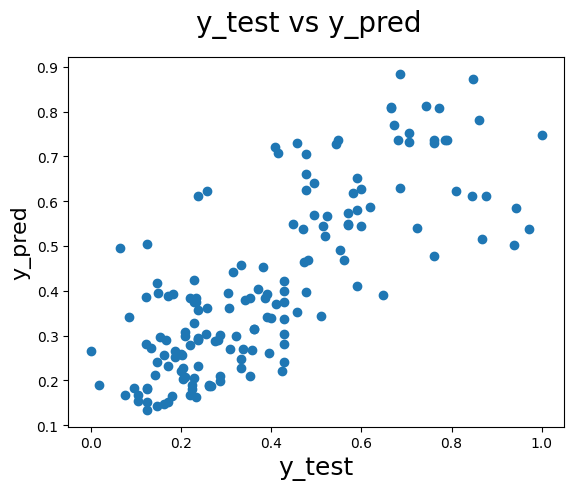

In [ ]:
#plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)